In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Import Mask RCNN
from mrcnn import visualize
import mrcnn.model as modellib

from samples.brixilated_lego import lego
tf.__version__

2021-10-23 00:15:19.405874: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


'2.5.0'

In [2]:
ROOT_DIR = './'
os.chdir(ROOT_DIR)

In [3]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [4]:
config = lego.LegoConfig()
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

In [5]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
LEGO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "snapshots", "weights","mask_rcnn_lego_0111.h5") # Comment out to use snapshot from latest training

model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
print("Loading weights ", LEGO_WEIGHTS_PATH)
model.load_weights(LEGO_WEIGHTS_PATH, by_name=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead


2021-10-23 00:15:24.515528: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-10-23 00:15:24.576199: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-23 00:15:24.576229: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-23 00:15:24.579208: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-23 00:15:24.579250: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-10-23 00:15:24.579942: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.

Loading weights  ./snapshots/weights/mask_rcnn_lego_0111.h5


2021-10-23 00:15:25.701403: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-23 00:15:25.703314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-23 00:15:25.704407: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2021-10-23 00:15:25.704453: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-23 00:15:26.109203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect Stream

In [6]:
DATASET = "val"
LEGO_DIR = os.path.join(ROOT_DIR, "datasets", "output", "coco_data")

dataset = lego.LegoDataset()
dataset.load_coco(LEGO_DIR, DATASET)
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

loading annotations into memory...
Done (t=5.69s)
creating index...
index created!
Images: 3029
Classes: ['BG', '2431', '3003', '3005', '3010', '3020', '3021', '3022', '3023', '3024', '3069', '3070', '3176', '3622', '3700', '3710', '3958', '4150', '4274', '6141', '11211', '11476', '11477', '15068', '15573', '22885', '24201', '24246', '25269', '29119', '29120', '33909', '35480', '36840', '47458', '47905', '85984', '87079', '87087', '87580', '93273', '98138', '99206']


/home/panda/.conda/envs/lego/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2021-10-23 00:15:36.948705: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-10-23 00:15:37.301378: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8200
2021-10-23 00:15:37.744455: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-23 00:15:38.139331: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


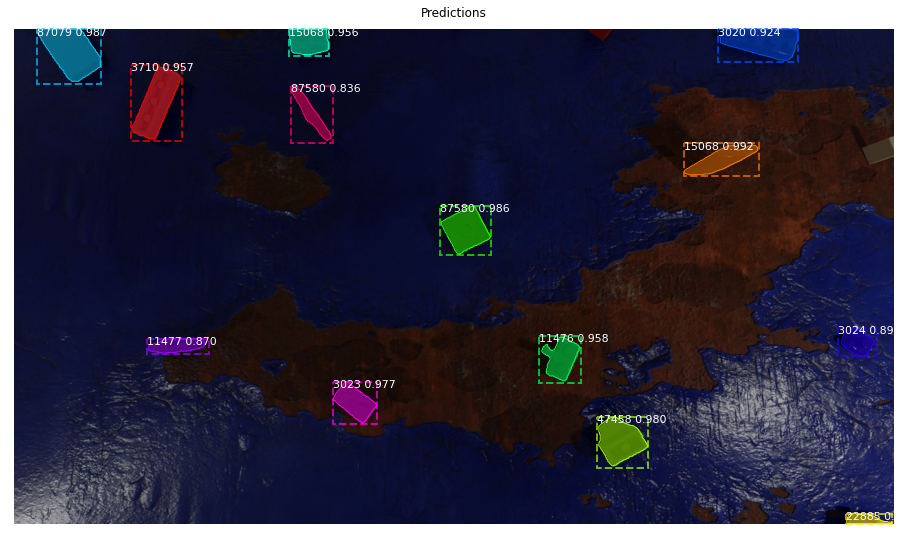

In [7]:
# load random image from dataset
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)

# Run object detection
results = model.detect([image], verbose=0)
r = results[0]

ax = get_ax(1)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], ax=ax, title="Predictions")

In [8]:
r

{'rois': array([[ 166,  976,  213, 1084],
        [   0,   33,   79,  126],
        [ 257,  620,  328,  695],
        [ 564,  849,  638,  923],
        [ 513,  464,  575,  528],
        [ 446,  764,  515,  825],
        [  52,  170,  163,  244],
        [   0,  400,   38,  458],
        [   0, 1025,   47, 1142],
        [ 435, 1200,  476, 1256],
        [ 450,  194,  473,  284],
        [  82,  403,  165,  465],
        [ 705, 1212,  720, 1279]], dtype=int32),
 'class_ids': array([23, 37, 39, 34,  8, 21, 15, 23,  5,  9, 22, 39, 25], dtype=int32),
 'scores': array([0.9920995 , 0.9872393 , 0.985629  , 0.9801672 , 0.97705954,
        0.95848215, 0.9569204 , 0.9558688 , 0.9242409 , 0.8911709 ,
        0.8699394 , 0.83555186, 0.779137  ], dtype=float32),
 'masks': array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, 